# Kolmogorov-Smirnov (KS) Statistics is one of the most important metrics used for validating predictive models. It is widely used in BFSI domain. If you are a part of risk or marketing analytics team working on project in banking, you must have heard of this metrics.

## What is KS Statistics?
It stands for Kolmogorov–Smirnov which is named after Andrey Kolmogorov and Nikolai Smirnov. It compares the two cumulative distributions and returns the maximum difference between them. It is a non-parametric test which means you don't need to test any assumption related to the distribution of data. In KS Test, Null hypothesis states null both cumulative distributions are similar. Rejecting the null hypothesis means cumulative distributions are different.

In data science, it compares the cumulative distribution of events and non-events and KS is where there is a maximum difference between the two distributions. In simple words, it helps us to understand how well our predictive model is able to discriminate between events and non-events.

Suppose you are building a propensity model in which objective is to identify prospects who are likely to buy a particular product. In this case, dependent (target) variable is in binary form which has only two outcomes : 0 (Non-event) or 1 (Event). "Event" means people who purchased the product. "Non-event" refers to people who didn't buy the product. KS Statistics measures whether model is able to distinguish between prospects and non-prospects.

## Two ways to measure KS Statistic
### Method 1 : Decile Method

This method is the most common way to calculate KS statistic for validating binary predictive model. See the steps below.
1. You need to have two variables before calculating KS. One is dependent variable which should be binary. Second one is predicted probability score which is generated from statistical model.
2. Create deciles based on predicted probability columns which means dividing probability into 10 parts. First decile should contain highest probability score.
3. Calculate the cumulative % of events and non-events in each decile and then compute the difference between these two cumulative distribution.
4. KS is where the difference is maximum
5. If KS is in top 3 decile and score above 40, it is considered a good predictive model. At the same time it is important to validate the model by checking other performance metrics as well to confirm that model is not suffering from overfitting problem.

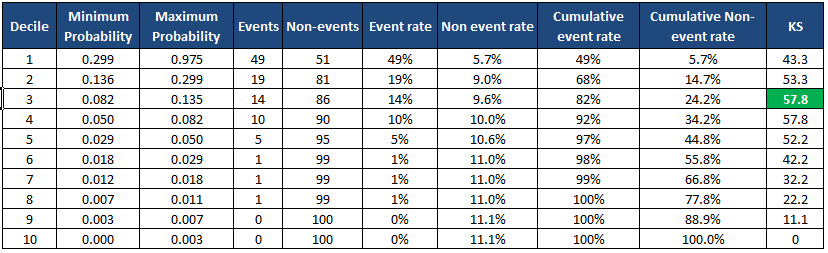

### Python : KS Statistics Decile Method

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv("https://raw.githubusercontent.com/deepanshu88/data/master/data.csv")

In [2]:
df.head()

,p,y
0,0.063817,0
1,0.004442,0
2,0.150929,0
3,0.223016,0
4,0.067777,0


In [3]:
def ks(data=None,target=None, prob=None):
    data['target0'] = 1 - data[target]
    data['bucket'] = pd.qcut(data[prob], 10)
    grouped = data.groupby('bucket', as_index = False)
    kstable = pd.DataFrame()
    kstable['min_prob'] = grouped.min()[prob]
    kstable['max_prob'] = grouped.max()[prob]
    kstable['events']   = grouped.sum()[target]
    kstable['nonevents'] = grouped.sum()['target0']
    kstable = kstable.sort_values(by="min_prob", ascending=False).reset_index(drop = True)
    kstable['event_rate'] = (kstable.events / data[target].sum()).apply('{0:.2%}'.format)
    kstable['nonevent_rate'] = (kstable.nonevents / data['target0'].sum()).apply('{0:.2%}'.format)
    kstable['cum_eventrate']=(kstable.events / data[target].sum()).cumsum()
    kstable['cum_noneventrate']=(kstable.nonevents / data['target0'].sum()).cumsum()
    kstable['KS'] = np.round(kstable['cum_eventrate']-kstable['cum_noneventrate'], 3) * 100

    #Formating
    kstable['cum_eventrate']= kstable['cum_eventrate'].apply('{0:.2%}'.format)
    kstable['cum_noneventrate']= kstable['cum_noneventrate'].apply('{0:.2%}'.format)
    kstable.index = range(1,11)
    kstable.index.rename('Decile', inplace=True)
    pd.set_option('display.max_columns', 9)
    print(kstable)
    
    #Display KS
    from colorama import Fore
    print(Fore.RED + "KS is " + str(max(kstable['KS']))+"%"+ " at decile " + str((kstable.index[kstable['KS']==max(kstable['KS'])][0])))
    return(kstable)

### How to use the function

In [4]:
mydf = ks(data=df,target="y", prob="p")

        min_prob  max_prob  events  nonevents event_rate nonevent_rate  \
Decile                                                                   
1       0.298894  0.975404      49         51     49.00%         5.67%   
2       0.135598  0.298687      19         81     19.00%         9.00%   
3       0.082170  0.135089      14         86     14.00%         9.56%   
4       0.050369  0.082003      10         90     10.00%        10.00%   
5       0.029415  0.050337       5         95      5.00%        10.56%   
6       0.018343  0.029384       1         99      1.00%        11.00%   
7       0.011504  0.018291       1         99      1.00%        11.00%   
8       0.006976  0.011364       1         99      1.00%        11.00%   
9       0.002929  0.006964       0        100      0.00%        11.11%   
10      0.000073  0.002918       0        100      0.00%        11.11%   

       cum_eventrate cum_noneventrate    KS  
Decile                                       
1             49.00

### Method 2 : KS Two Sample Test

In [5]:
from scipy.stats import ks_2samp
df = pd.read_csv("https://raw.githubusercontent.com/deepanshu88/data/master/data.csv")
ks_2samp(df.loc[df.y==0,"p"], df.loc[df.y==1,"p"])

Ks_2sampResult(statistic=0.6033333333333334, pvalue=5.551115123125783e-16)

By using scipy python library, we can calculate two sample KS Statistic. It has two parameters - data1 and data2. In data1, We will enter all the probability scores corresponding to non-events. In data2, it will take probability scores against events.

#### Important Note
The KS score of method 2 is slightly different from method 1 as second one is calculated at row level and the first one is calculated after converting data into ten parts.

#############################################################################################################################

**Kolmogorov–Smirnov test a very efficient way to determine if two samples are significantly different from each other. It is usually used to check the uniformity of random numbers. Uniformity is one of the most important properties of any random number generator and Kolmogorov–Smirnov test can be used to test it.
The Kolmogorov–Smirnov test may also be used to test whether two underlying one-dimensional probability distributions differ. It is a very efficient way to determine if two samples are significantly different from each other.**

## The Kolmogorov–Smirnov statistic quantifies a distance between the empirical distribution function of the sample and the cumulative distribution function of the reference distribution, or between the empirical distribution functions of two samples.

### Hypothesis Used –

#### H0(Null Hypothesis): Null hypothesis assumes that the numbers are uniformly distributed between 0-1.
If we are able to reject the Null Hypothesis, this means that the numbers are not uniformly distributed between 0-1. Failure to reject the Null Hypothesis although does not necessarily mean that the numbers follow the uniform distribution.
 

### Parameters

* Statistics: This is the calculated value of D, where D=|F(x)-Sn(x)|.
-> This D is compared with Dalpha where alpha is the level of significance. Alpha is defined as the probability of rejecting the null hypothesis given the null hypothesis(H0) is true. For most of the practical applications, alpha is chosen as 0.05.

* p-value: This is calculated with the help of D.
-> If pvalue> alpha, we fail to reject the null hypothesis. Otherwise, we conclude that the numbers are not uniform. Ideally, the p-value should be as large as possible. For perfect uniform distribution pvalue=1 and Statisitics=0.

In [8]:
from scipy.stats import kstest
import random
  
# N = int(input("Enter number of random numbers: "))
N = 5
  
actual =[]
print("Enter outcomes: ")
for i in range(N):
    # x = float(input("Outcomes of class "+str(i + 1)+": "))
    actual.append(random.random())
  
print(actual)
x = kstest(actual, "uniform")   
print(x)

Enter outcomes: 
[0.365173899070681, 0.7330254957666865, 0.1289720957912478, 0.5262601170033087, 0.9462155795502064]
KstestResult(statistic=0.16517389907068097, pvalue=0.9991984379490279)


KS Test is a very powerful way to automatically differentiate samples from a different distribution. kstest function may also be used to check whether the data given follows Normal Distribution or not. It compares the observed versus the expected cumulative relative frequencies of the Normal Distribution. The Kolmogorov-Smirnov test uses the maximal absolute difference between the observed and expected cumulative distribution.

* The Null hypothesis used here assumes that the numbers follow the normal distribution.
* The functioning of the function remains exactly same. Again it returns statistics and p-value. If the p-value is < alpha, we reject the Null hypothesis.

In [10]:

from scipy.stats import kstest
import random
  
# N = int(input("Enter number of random numbers: "))
N = 10
  
actual =[]
print("Enter outcomes: ")
  
for i in range(N):
    # x = float(input("Outcomes of class "+str(i + 1)+": "))
    actual.append(random.random())
  
print(actual)
x = kstest(actual, "norm")   
print(x)

Enter outcomes: 
[0.07261328218497565, 0.21190275098867684, 0.20504182948773964, 0.6008573963377676, 0.38686018118624976, 0.02690048519952748, 0.9575159244474957, 0.26285543048037185, 0.3866089592797991, 0.46970979838102966]
KstestResult(statistic=0.510730446737354, pvalue=0.006053256175401917)
